# Proyecto EDA

## Importamos librerías

In [2]:
import numpy as np
import pandas as pd
import os
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

In [3]:
os.getcwd()
Path.cwd()

WindowsPath('c:/Users/fquin/Desktop/Proyectos_bootcamp/Proyecto-EDA_2.0')

In [4]:
os.listdir('CSV')

['circuits (2).csv',
 'circuits.csv',
 'constructors (2).csv',
 'constructors.csv',
 'constructor_results (2).csv',
 'constructor_results.csv',
 'constructor_standings (2).csv',
 'constructor_standings.csv',
 'drivers (2).csv',
 'drivers.csv',
 'driver_standings (2).csv',
 'driver_standings.csv',
 'lap_times.csv (2).zip',
 'lap_times.csv.zip',
 'pit_stops (2).csv',
 'pit_stops.csv',
 'qualifying (2).csv',
 'qualifying.csv',
 'races (2).csv',
 'races.csv',
 'results.csv (2).zip',
 'results.csv.zip',
 'seasons (2).csv',
 'seasons.csv',
 'sprint_results (2).csv',
 'sprint_results.csv',
 'status (2).csv',
 'status.csv']

# Leemos CSV's

In [5]:
#1 circuits
circuits=pd.read_csv("./CSV/circuits.csv")# aqui lei el csv df con pd.read
#circuits Para visualizar DF

In [6]:
#2 constructors
constructors=pd.read_csv("./CSV/constructors.csv") #aqui lei el csv con pd.read
#constructors # Para visualizar DF

In [7]:
#3 constructor_results
constructor_results=pd.read_csv("./CSV/constructor_results.csv")#aqui lei el csv con pd.read
#constructor_results # Para visualizar DF

In [8]:
#4 constructor standings
constructor_standings=pd.read_csv("./CSV/constructor_standings.csv")#aqui lei el csv con pd.read
#constructor_standings # Para visualizar DF

In [9]:
#5 driver standings
driver_standings=pd.read_csv("./CSV/driver_standings.csv")#aqui lei el csv con pd.read
#driver_standings  # Para visualizar DF

In [10]:
#6 races
races=pd.read_csv("./CSV/races.csv") #aqui lei el csv con pd.read
#races # Para visualizar DF

In [11]:
#7 seasons
seasons=pd.read_csv("./CSV/seasons.csv")#aqui lei el csv con pd.read
#seasons # Para visualizar DF

In [12]:
#8 drivers
drivers=pd.read_csv("./CSV/drivers.csv")#aqui lei el csv con pd.read
#drivers # Para visualizar DF

#### Una vez leidos los csv, hice un estudio de los datos, principalmente para entenderlos.

## LIMPIANDO CSV's

In [13]:
#Constructors

"""Limpieza de columnas que no eran relevantes para obtener los resultados.
y asignar nombre de variables, para tener las nuevas versiones preparadas para pd.merge"""


constructors=pd.read_csv("./CSV/constructors.csv")
constructor_clean=constructors.drop(["constructorRef","url"],axis=1)

#constructor_clean # Para visualizar DF

In [14]:
constructor_results=pd.read_csv("./CSV/constructor_results.csv")
constructor_results_clean=constructor_results.drop(["status","points"],axis=1)

#constructor_results_clean # Para visualizar DF

In [15]:
constructor_standings=pd.read_csv("./CSV/constructor_standings.csv")
constructor_standings=constructor_standings.drop("points",axis=1)

#constructor_standings # Para visualizar DF

In [16]:
races=pd.read_csv("./CSV/races.csv")
races=races.drop(["round","date","time","url","fp1_date","fp1_time","fp2_date","fp2_time","fp3_date","fp3_time","quali_date","quali_time","sprint_date","sprint_time"],axis=1)

#races # Para visualizar DF

#### Limpieza de columnas que no eran relevantes para obtener los resultados.Tomando en cuenta la mayor cantidad de datos relevantes posibles y asignar nombre de variables, para tener las nuevas versiones preparadas para pd.merge

## Construyendo nuevos CSV's

### Construyendo df_qty_carreras_por_escuderias_TOP35

In [17]:
"""Uniendo DF para crear principal"""

constructor_standings_constructor_clean=pd.merge(constructor_standings,constructor_clean)

constructor_standings_constructor_clean

,constructorStandingsId,raceId,constructorId,position,positionText,wins,name,nationality
0,1,18,1,1,1,1,McLaren,British
1,7,19,1,1,1,1,McLaren,British
2,18,20,1,3,3,1,McLaren,British
3,29,21,1,3,3,1,McLaren,British
4,40,22,1,3,3,1,McLaren,British
...,...,...,...,...,...,...,...,...
12836,28227,1082,214,5,5,0,Alpine F1 Team,French
12837,28237,1083,214,5,5,0,Alpine F1 Team,French
12838,28247,1084,214,5,5,0,Alpine F1 Team,French
12839,28257,1085,214,4,4,0,Alpine F1 Team,French


In [18]:
df_esc=constructor_standings_constructor_clean.groupby("name")["raceId"].count().sort_values(ascending=False)



""".groupby para obtener DF con información de escuderias y sus cantidades de carreras"""

df_qty_carreras_por_escuderias=pd.DataFrame(df_esc).reset_index()
df_qty_carreras_por_escuderias=df_qty_carreras_por_escuderias.rename(columns={'name':'Equipo','raceId':'Qty_carreras'})

df_qty_carreras_por_escuderias_TOP35=  df_qty_carreras_por_escuderias.head(35)
df_qty_carreras_por_escuderias_TOP35

,Equipo,Qty_carreras
0,Ferrari,1003
1,McLaren,874
2,Williams,802
3,Tyrrell,426
4,Renault,406
5,Team Lotus,405
6,Sauber,388
7,Red Bull,338
8,Minardi,337
9,Ligier,332


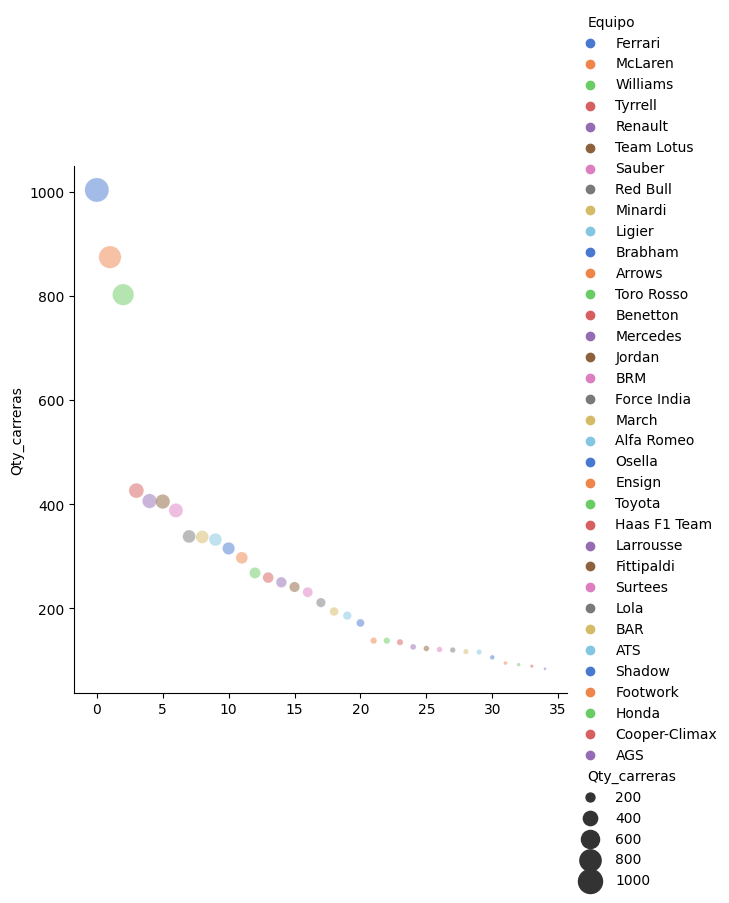

In [19]:
sns.relplot(data=df_qty_carreras_por_escuderias_TOP35,            
            x=df_qty_carreras_por_escuderias_TOP35.index,
            y="Qty_carreras",
            hue="Equipo",
            size="Qty_carreras",
            sizes=(4, 300),
            alpha=.5, palette="muted",
            height=6);

#### constructor_final

In [20]:
#CONSTRUYENDO EL DF_CONSTRUCTOR_FINAL
constructors=pd.read_csv("./CSV/constructors.csv")#Read CSV
constructor_clean=constructors.drop(["constructorRef","url"],axis=1)#Limpieza CSV

In [21]:
constructor_standings=pd.read_csv("./CSV/constructor_standings.csv")#Read CSV
constructor_standings=constructor_standings.drop("points",axis=1)#Limpieza CSV
#constructor_clean
#constructor_standings

In [22]:
constructor_final=pd.merge(constructor_standings,constructor_clean)#Uniendo DF limpios
constructor_final=pd.merge(constructor_final,races,on="raceId")#Creando DF con mas datos
constructor_final

,constructorStandingsId,raceId,constructorId,position,positionText,wins,name_x,nationality,year,circuitId,name_y
0,1,18,1,1,1,1,McLaren,British,2008,1,Australian Grand Prix
1,2,18,2,3,3,0,BMW Sauber,German,2008,1,Australian Grand Prix
2,3,18,3,2,2,0,Williams,British,2008,1,Australian Grand Prix
3,4,18,4,4,4,0,Renault,French,2008,1,Australian Grand Prix
4,5,18,5,5,5,0,Toro Rosso,Italian,2008,1,Australian Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...
12836,20739,679,183,5,5,0,Brabham-Climax,British,1967,30,South African Grand Prix
12837,20736,679,170,2,2,0,Cooper-Climax,British,1967,30,South African Grand Prix
12838,20741,679,176,7,7,0,Lotus-BRM,British,1967,30,South African Grand Prix
12839,20740,679,184,6,6,0,LDS-Climax,South African,1967,30,South African Grand Prix


#### df_num_total_carreras_escuderias

In [23]:
#Aqui necesitaba total de carreras disputadas, y total escuderias"""
var1=num_total_carreras=int(constructor_final["raceId"].max())
var2=num_total_escuderias=int(len(constructor_final["name_x"].unique()))

In [24]:
#Crear DF con los resultados obtenidos
df_num_total_carreras_escuderias=(pd.DataFrame({"Total Escuderías Participantes":[var2],"Total Carreras Celebradas":[var1]}))
#df_num_total_carreras_escuderias


In [25]:
#Transponer, igualando a la variable para el DF final
df_num_total_carreras_escuderias=df_num_total_carreras_escuderias.T 
df_num_total_carreras_escuderias=df_num_total_carreras_escuderias.rename(columns={0:"Total"})#renombrando columnas
#df_num_total_carreras_escuderias

In [26]:
df_num_total_carreras_escuderias=df_num_total_carreras_escuderias.rename(columns={'Total':'Total_histórico'})
#Guardo CSV

df_num_total_carreras_escuderias

,Total_histórico
Total Escuderías Participantes,159
Total Carreras Celebradas,1086


In [27]:
#CONSTRUYENDO ESCUDERIAS CON PODIOS
df_escuderias_podios=constructor_final[(constructor_final.position > 0)&(constructor_final.position<4)]

"""En esta ventana necesitaba filtrar la información de las posiciones obtenidas, asi que aplique una mascara booleana"""


df_escuderias_podios=df_escuderias_podios.groupby("position")["name_x"].value_counts()
df_escuderias_podios=pd.DataFrame(df_escuderias_podios)

#df_escuderias_podios

In [28]:
"""En esta etapa, quería contar el numero de veces que una escudería habia obtenido cada posicion (1,2,3)"""

#constructor_final
df_escuderias_podios_totales=constructor_final[(constructor_final.position > 0)&(constructor_final.position<4)]
var1=df_escuderias_podios_totales=int(len(df_escuderias_podios_totales["name_x"].unique()))
var2=num_total_escuderias=int(len(constructor_final["name_x"].unique()))
var3=round((var1/var2)*100)
var3="{}%".format(var3)

In [29]:
"""En esta etapa, calculo el RATIO de la cantidad de escuderias del total que han participado, logran subir al podio """

#var3
df_escuderias_podios_totales=(pd.DataFrame({"Total Escuderias Participantes":[var2],"Escuderias con podios":[var1],"Porcentaje de Escuderias con podios":[var3]}))
#Creo el DF pasandole un diccionario, con nombre de la columna:variable con información relevante
df_escuderias_podios_totales=df_escuderias_podios_totales.T #Transponse
df_escuderias_podios_totales=df_escuderias_podios_totales.rename(columns={0:"Total_histórico"})
df_escuderias_podios_totales

df_escuderias_podios_totales

,Total_histórico
Total Escuderias Participantes,159
Escuderias con podios,47
Porcentaje de Escuderias con podios,30%


In [30]:
df_escuderias_podios_year=constructor_final[(constructor_final.position == 3)]

df_escuderias_podios_year=df_escuderias_podios_year.groupby(["position"])["name_x"].value_counts()
df_escuderias_podios_count=pd.DataFrame(df_escuderias_podios_year)
#df_escuderias_podios_year.to_csv("./DATASET_FINALES/df_escuderias_podios_year.csv")
df_escuderias_podios_count=df_escuderias_podios_count.rename(columns={'name_x':'position_count'})
df_escuderias_podios_count=df_escuderias_podios_count.rename(columns={'name_x':'Equipo'})
"""Utilice el mismo codigo para extraer vista relevante para el EDA""";
#df_escuderias_podios
df_escuderias_podios_count.reset_index(inplace=True)
df_escuderias_podios_count_3er=df_escuderias_podios_count.rename(columns={'name_x':'Equipo'})
df_escuderias_podios_count_3er


,position,Equipo,position_count
0,3,Ferrari,218
1,3,McLaren,145
2,3,Williams,101
3,3,Red Bull,80
4,3,Benetton,70
5,3,Team Lotus,66
6,3,Renault,48
7,3,Brabham,34
8,3,Tyrrell,29
9,3,BRM,23


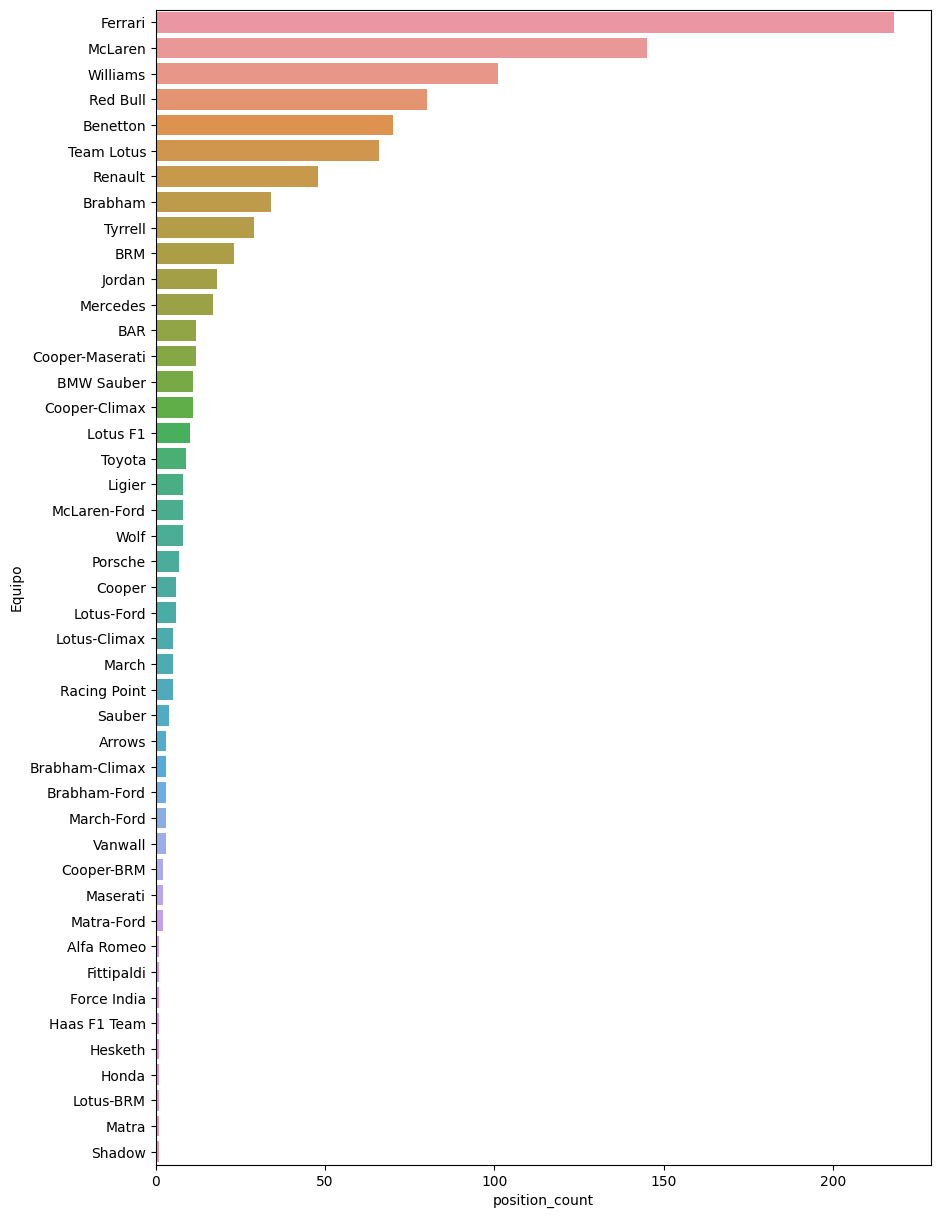

In [31]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Barplot
sns.set_color_codes("pastel")
sns.barplot(x=df_escuderias_podios_count_3er.position_count,
            y=df_escuderias_podios_count_3er.Equipo);



In [32]:
df_escuderias_podios_year=constructor_final[(constructor_final.position == 2)]

df_escuderias_podios_year=df_escuderias_podios_year.groupby(["position"])["name_x"].value_counts()
df_escuderias_podios_count=pd.DataFrame(df_escuderias_podios_year)
#df_escuderias_podios_year.to_csv("./DATASET_FINALES/df_escuderias_podios_year.csv")
df_escuderias_podios_count=df_escuderias_podios_count.rename(columns={'name_x':'position_count'})
df_escuderias_podios_count=df_escuderias_podios_count.rename(columns={'name_x':'Equipo'})
"""Utilice el mismo codigo para extraer vista relevante para el EDA""";
#df_escuderias_podios
df_escuderias_podios_count.reset_index(inplace=True)
df_escuderias_podios_count_2do=df_escuderias_podios_count.rename(columns={'name_x':'Equipo'})
df_escuderias_podios_count_2do

,position,Equipo,position_count
0,2,Ferrari,301
1,2,McLaren,186
2,2,Williams,96
3,2,Red Bull,82
4,2,Brabham,43
5,2,Team Lotus,37
6,2,Tyrrell,30
7,2,BRM,27
8,2,Mercedes,26
9,2,BMW Sauber,24


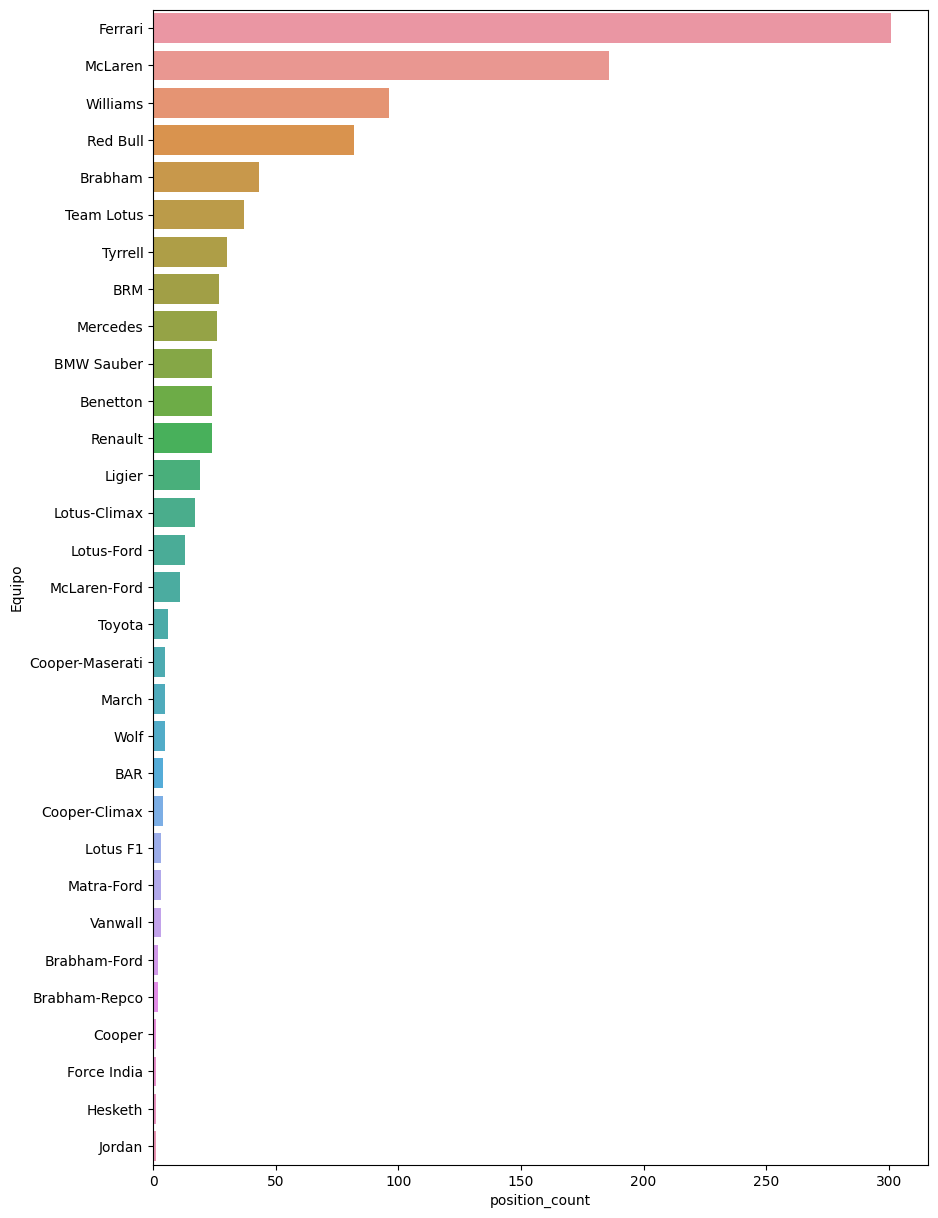

In [33]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Barplot
sns.set_color_codes("pastel")
sns.barplot(x=df_escuderias_podios_count_2do.position_count,
            y=df_escuderias_podios_count_2do.Equipo);

In [34]:
df_escuderias_podios_year=constructor_final[(constructor_final.position == 1)]

df_escuderias_podios_year=df_escuderias_podios_year.groupby(["position"])["name_x"].value_counts()
df_escuderias_podios_count=pd.DataFrame(df_escuderias_podios_year)
#df_escuderias_podios_year.to_csv("./DATASET_FINALES/df_escuderias_podios_year.csv")
df_escuderias_podios_count=df_escuderias_podios_count.rename(columns={'name_x':'position_count'})
df_escuderias_podios_count=df_escuderias_podios_count.rename(columns={'name_x':'Equipo'})
"""Utilice el mismo codigo para extraer vista relevante para el EDA""";
#df_escuderias_podios
df_escuderias_podios_count.reset_index(inplace=True)
df_escuderias_podios_count_1er=df_escuderias_podios_count.rename(columns={'name_x':'Equipo'})
df_escuderias_podios_count_1er

,position,Equipo,position_count
0,1,Ferrari,234
1,1,McLaren,165
2,1,Mercedes,145
3,1,Williams,114
4,1,Red Bull,77
5,1,Renault,46
6,1,Team Lotus,44
7,1,Benetton,29
8,1,Lotus-Climax,23
9,1,Cooper-Climax,20


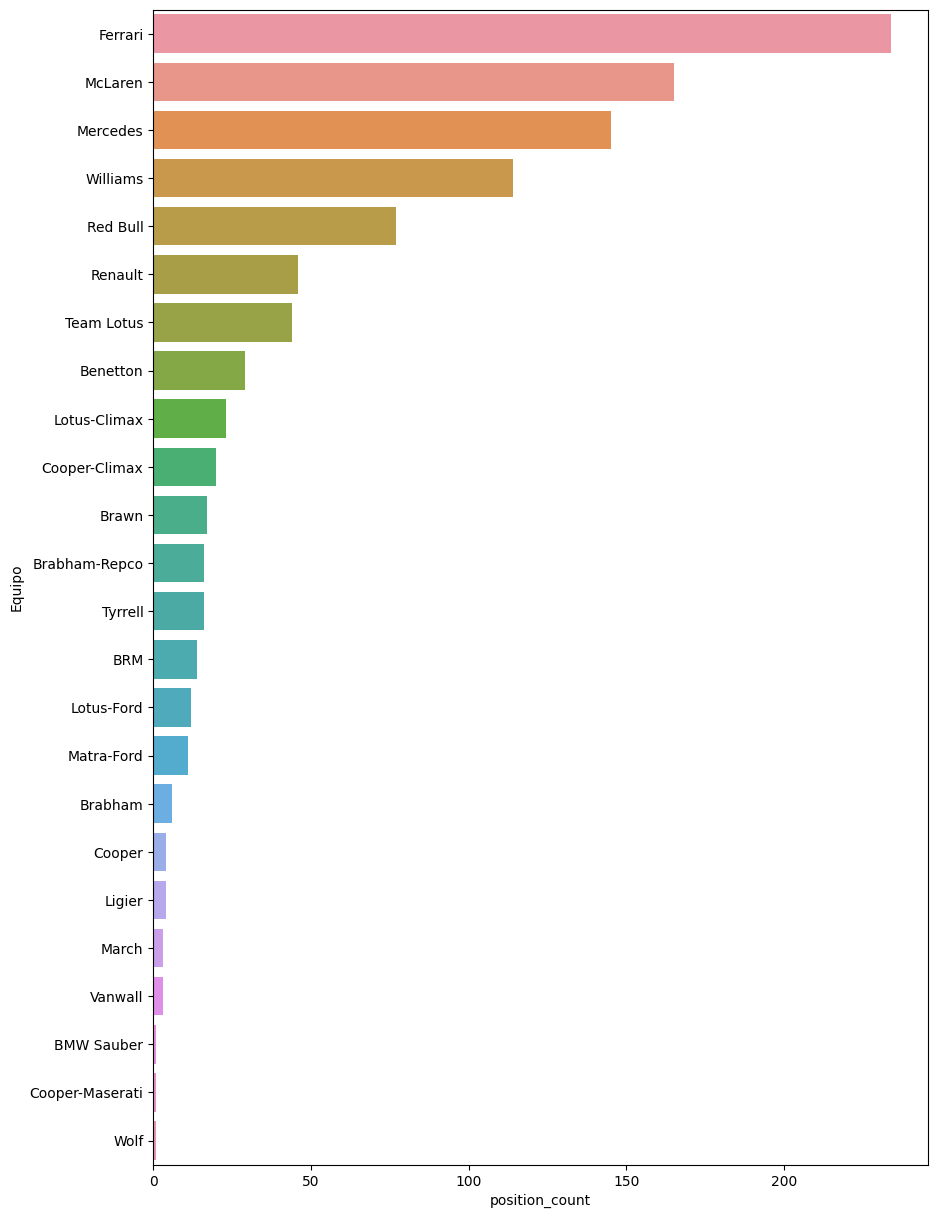

In [35]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Barplot
sns.set_color_codes("pastel")
sns.barplot(x=df_escuderias_podios_count_1er.position_count,
            y=df_escuderias_podios_count_1er.Equipo);

### CONSTRUYENDO EFECTIVIDAD PODIOS

In [36]:
#repito el mismo proceso de mascara booleana y group by para obnter información relevante
df_escuderias_podios_efectividad_totales=constructor_final[(constructor_final.position > 0)&(constructor_final.position<4)]
df_escuderias_podios_efectividad_totales=df_escuderias_podios_efectividad_totales.groupby(["name_x","year"])["position"].count()
#df_escuderias_podios_efectividad_totales

In [37]:
#paso a DF y indico nombres correctos
df_escuderias_podios_efectividad_totales=pd.DataFrame(df_escuderias_podios_efectividad_totales).reset_index()
df_escuderias_podios_efectividad_totales=df_escuderias_podios_efectividad_totales=df_escuderias_podios_efectividad_totales.rename(columns={"positionText":"Efectividad_podio"}).reset_index()
df_escuderias_podios_efectividad_totales

,index,name_x,year,position
0,0,Alfa Romeo,1981,1
1,1,Arrows,1981,3
2,2,BAR,2000,1
3,3,BAR,2004,15
4,4,BMW Sauber,2007,17
...,...,...,...,...
288,288,Williams,2008,1
289,289,Williams,2014,8
290,290,Williams,2015,18
291,291,Williams,2016,1


In [38]:
#Corregir errores del DF, y reparando formatos para facilitar lecturas con tableau
total_carreras_acumuladas=constructor_final["name_x"].value_counts()
df_total_carreras_acumuladas=pd.DataFrame(total_carreras_acumuladas).reset_index()
df_total_carreras_acumuladas=df_total_carreras_acumuladas.rename(columns={"index":"name_xx"})
df_total_carreras_acumuladas=df_total_carreras_acumuladas.rename(columns={"name_x":"TotalGP"})
df_total_carreras_acumuladas=df_total_carreras_acumuladas.rename(columns={"name_xx":"name_x"})
df_total_carreras_acumuladas

,name_x,TotalGP
0,Ferrari,1003
1,McLaren,874
2,Williams,802
3,Tyrrell,426
4,Renault,406
...,...,...
154,Kojima,2
155,Cooper-Alfa Romeo,1
156,Kurtis Kraft,1
157,Cooper-OSCA,1


In [39]:
#Uniendo columnas 
df_escuderias_podios_efectividad_totales=pd.merge(df_escuderias_podios_efectividad_totales,df_total_carreras_acumuladas)
df_escuderias_podios_efectividad_totales=df_escuderias_podios_efectividad_totales.rename(columns={"position":"Total_podios"})


In [40]:
#Dividiendo columnas con pandas
columna_efectividad_total=(df_escuderias_podios_efectividad_totales["Total_podios"]/df_escuderias_podios_efectividad_totales["TotalGP"])*100


In [41]:
#En esta etapa hago un nuevo DF con las 3 columnas.
columna_efectividad_total=pd.DataFrame(columna_efectividad_total).reset_index()
columna_efectividad_total
columna_efectividad_total=columna_efectividad_total.rename(columns={0:"Total_Efectividad"})
columna_efectividad_total
df_escuderias_podios_efectividad_totales=pd.merge(df_escuderias_podios_efectividad_totales,columna_efectividad_total,on="index")
df_escuderias_podios_efectividad_totales=df_escuderias_podios_efectividad_totales.drop(["index"],axis=1)

#df_escuderias_podios_efectividad_totales.to_csv("./DATASET_FINALES/df_escuderias_podios_efectividad_totales.csv")

df_escuderias_podios_efectividad_totales

,name_x,year,Total_podios,TotalGP,Total_Efectividad
0,Alfa Romeo,1981,1,186,0.537634
1,Arrows,1981,3,297,1.010101
2,BAR,2000,1,117,0.854701
3,BAR,2004,15,117,12.820513
4,BMW Sauber,2007,17,70,24.285714
...,...,...,...,...,...
288,Williams,2008,1,802,0.124688
289,Williams,2014,8,802,0.997506
290,Williams,2015,18,802,2.244389
291,Williams,2016,1,802,0.124688


In [42]:
df_escuderias_podios_efectividad_totales=df_escuderias_podios_efectividad_totales.sort_values(by='Total_Efectividad',ascending=False)


df_escuderias_podios_efectividad_totales=df_escuderias_podios_efectividad_totales.rename(columns={'name_x':'Equipo'})


df_escuderias_podios_efectividad_totales=df_escuderias_podios_efectividad_totales.head(20)

df_escuderias_podios_efectividad_totales=df_escuderias_podios_efectividad_totales[['Equipo','Total_Efectividad']].reset_index()
df_escuderias_podios_efectividad_totales.drop('index',axis=1)
df_escuderias_podios_efectividad_totales

,index,Equipo,Total_Efectividad
0,45,Brawn,100.000000
1,46,Cooper,64.705882
2,151,Matra-Ford,47.826087
3,261,Vanwall,45.000000
4,147,March-Ford,27.272727
5,5,BMW Sauber,25.714286
6,4,BMW Sauber,24.285714
7,43,Brabham-Repco,23.255814
8,142,Lotus-Ford,22.222222
9,292,Wolf,21.875000


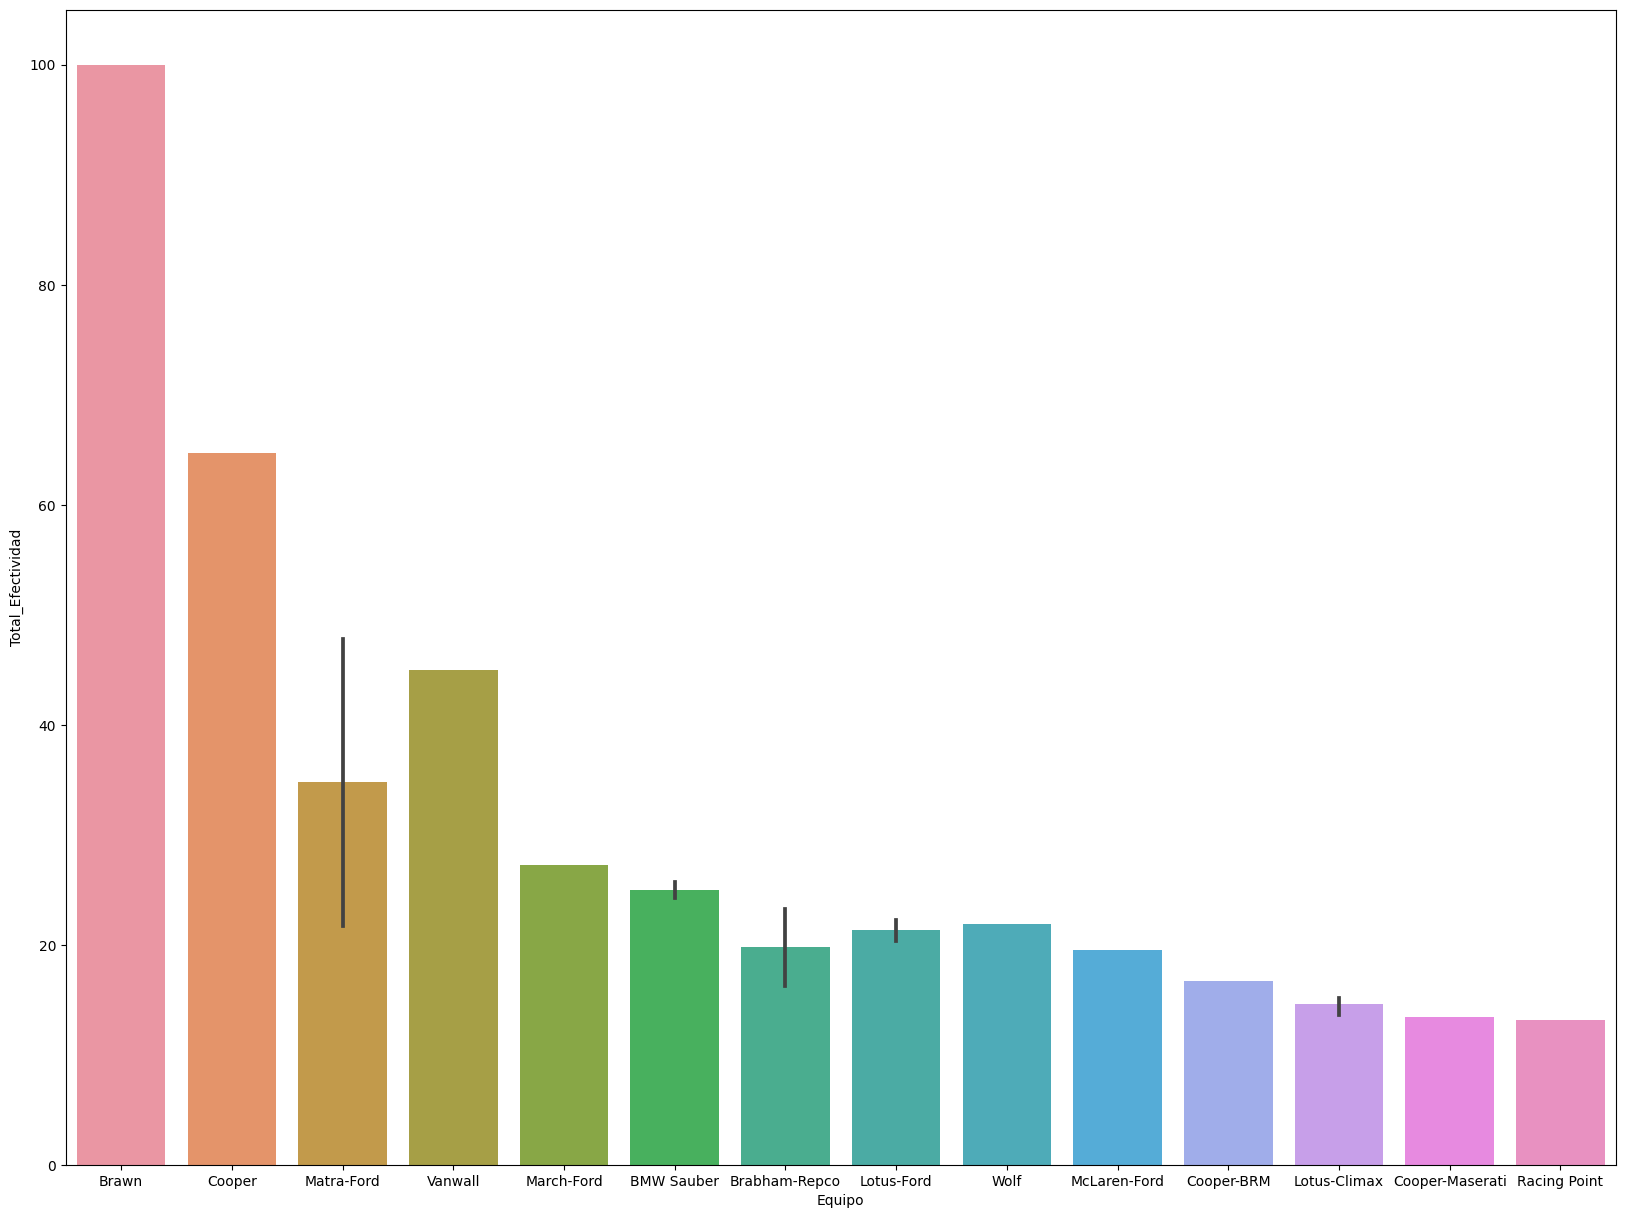

In [43]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Barplot
#sns.set_color_codes("pastel")
sns.barplot(x=df_escuderias_podios_efectividad_totales.Equipo,
            y=df_escuderias_podios_efectividad_totales.Total_Efectividad);